In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as matplot

base_dir = 'drive/MyDrive/Mondrian_Evaluation/'

idle = pd.read_csv(base_dir+'packet-in_idle.csv')
idle

,time,IDLE_TIMEOUT=15,IDLE_TIMEOUT=30,IDLE_TIMEOUT=60,IDLE_TIMEOUT=120,IDLE_TIMEOUT=240,IDLE_TIMEOUT=480
0,1,25,18,18,15,9,10
1,2,15,15,11,9,6,5
2,3,16,16,9,8,6,6
3,4,16,10,8,7,3,3
4,5,15,15,13,4,5,4
5,6,23,18,9,4,5,7
6,7,18,16,12,6,4,3
7,8,15,15,11,4,5,4
8,9,16,10,12,4,5,6
9,10,16,16,7,6,3,3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


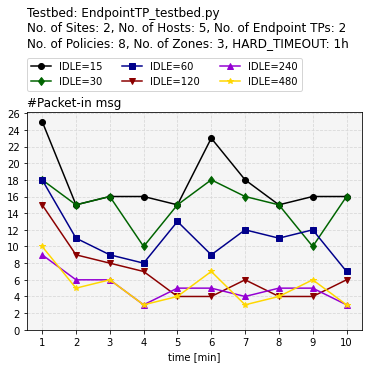

In [3]:
plt.title('Testbed: EndpointTP_testbed.py\nNo. of Sites: 2, No. of Hosts: 5, No. of Endpoint TPs: 2\nNo. of Policies: 8, No. of Zones: 3, HARD_TIMEOUT: 1h\n\n\n\n#Packet-in msg', loc='left')
#plt.ylabel('flops/cycle')

plt.xlabel('time [min]')
plt.plot(idle['time'], idle['IDLE_TIMEOUT=15'],'-o', label='IDLE=15', color='black')
plt.plot(idle['time'], idle['IDLE_TIMEOUT=30'],'-d', label='IDLE=30', color='darkgreen')
plt.plot(idle['time'], idle['IDLE_TIMEOUT=60'],'-s', label='IDLE=60', color='darkblue')
plt.plot(idle['time'], idle['IDLE_TIMEOUT=120'],'-v', label='IDLE=120', color='darkred')
plt.plot(idle['time'], idle['IDLE_TIMEOUT=240'],'-^', label='IDLE=240', color='darkviolet')
plt.plot(idle['time'], idle['IDLE_TIMEOUT=480'],'-*', label='IDLE=480', color='gold')



ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])

plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)
#plt.tight_layout()
plt.savefig(base_dir+'packet-in_idle.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


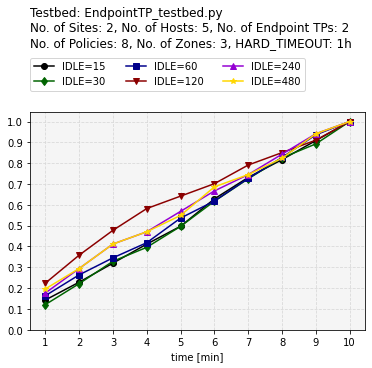

In [4]:
plt.title('Testbed: EndpointTP_testbed.py\nNo. of Sites: 2, No. of Hosts: 5, No. of Endpoint TPs: 2\nNo. of Policies: 8, No. of Zones: 3, HARD_TIMEOUT: 1h\n\n\n\n', loc='left')
#plt.ylabel('flops/cycle')

plt.xlabel('time [min]')

timeouts = [15, 30, 60, 120, 240, 480]
colors = ['black', 'darkgreen', 'darkblue', 'darkred', 'darkviolet', 'gold']
shapes = ['-o', '-d', '-s', '-v', '-^', '-*']
idle_dic = {'time':idle['time']}
for t in timeouts:
  idle_dic['IDLE_TIMEOUT='+str(t)]= idle['IDLE_TIMEOUT='+str(t)]
idle_df = pd.DataFrame(idle_dic)
idle_df
for t in timeouts:
  # PDF
  idle_df['pdf_'+str(t)] = idle_df['IDLE_TIMEOUT='+str(t)] / sum(idle_df['IDLE_TIMEOUT='+str(t)])
  # CDF
  idle_df['cdf_'+str(t)] = idle_df['pdf_'+str(t)].cumsum()
idle_df = idle_df.reset_index()
idle_df
for i in range(len(timeouts)):
  plt.plot(idle_df['time'], idle_df['cdf_'+str(timeouts[i])],shapes[i], label='IDLE='+str(timeouts[i]), color=colors[i])

ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)

plt.savefig(base_dir+'packet-in_idle_cdf.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

# Plot
#test.plot(x = 'time', y = ['cdf_15', 'cdf_480'], grid = True)

In [5]:
idle_new = pd.read_csv(base_dir+'/packet_in_idle_new/res_IDLE.csv')
idle_new

,second,IDLE_TIMEOUT=1,IDLE_TIMEOUT=2,IDLE_TIMEOUT=4
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
596,596,4,0,0
597,597,6,6,0
598,598,4,0,0
599,599,6,6,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


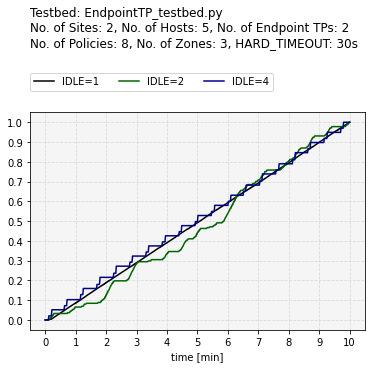

In [6]:
plt.title('Testbed: EndpointTP_testbed.py\nNo. of Sites: 2, No. of Hosts: 5, No. of Endpoint TPs: 2\nNo. of Policies: 8, No. of Zones: 3, HARD_TIMEOUT: 30s\n\n\n\n', loc='left')
#plt.ylabel('flops/cycle')

plt.xlabel('time [min]')

timeouts = [1, 2, 4]
colors = ['black', 'darkgreen', 'darkblue', 'darkred', 'darkviolet', 'gold']
shapes = ['-o', '-d', '-s', '-v', '-^', '-*']
idle_dic = {'time':idle_new['second']}
for t in timeouts:
  idle_dic['IDLE_TIMEOUT='+str(t)]= idle_new['IDLE_TIMEOUT='+str(t)]
idle_df = pd.DataFrame(idle_dic)
idle_df
for t in timeouts:
  # PDF
  idle_df['pdf_'+str(t)] = idle_df['IDLE_TIMEOUT='+str(t)] / sum(idle_df['IDLE_TIMEOUT='+str(t)])
  # CDF
  idle_df['cdf_'+str(t)] = idle_df['pdf_'+str(t)].cumsum()
idle_df = idle_df.reset_index()
idle_df
for i in range(len(timeouts)):
  plt.plot(idle_df['time'], idle_df['cdf_'+str(timeouts[i])], label='IDLE='+str(timeouts[i]), color=colors[i])

ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)

plt.savefig(base_dir+'packet-in_idle_new_cdf.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

# Plot
#test.plot(x = 'time', y = ['cdf_15', 'cdf_480'], grid = True)

In [7]:
hard = pd.read_csv(base_dir+'packet-in_hard.csv')
hard

,time,HARD_TIMEOUT=15,HARD_TIMEOUT=30,HARD_TIMEOUT=60,HARD_TIMEOUT=120,HARD_TIMEOUT=240,HARD_TIMEOUT=480
0,1,28,24,19,19,18,13
1,2,15,15,15,7,7,12
2,3,16,16,18,18,5,6
3,4,20,16,8,8,5,5
4,5,15,15,17,16,14,4
5,6,27,22,17,9,6,4
6,7,18,18,16,7,8,6
7,8,14,15,18,19,7,4
8,9,20,16,16,8,16,8
9,10,16,16,15,15,5,10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


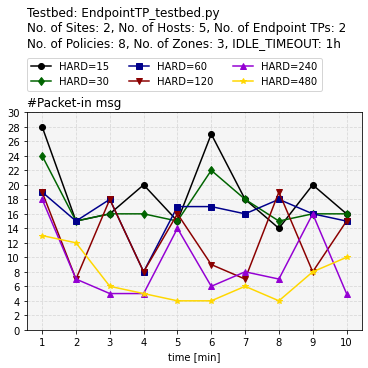

In [8]:
plt.title('Testbed: EndpointTP_testbed.py\nNo. of Sites: 2, No. of Hosts: 5, No. of Endpoint TPs: 2\nNo. of Policies: 8, No. of Zones: 3, IDLE_TIMEOUT: 1h\n\n\n\n#Packet-in msg', loc='left')


plt.xlabel('time [min]')
plt.plot(hard['time'], hard['HARD_TIMEOUT=15'],'-o', label='HARD=15', color='black')
plt.plot(hard['time'], hard['HARD_TIMEOUT=30'],'-d', label='HARD=30', color='darkgreen')
plt.plot(hard['time'], hard['HARD_TIMEOUT=60'],'-s', label='HARD=60', color='darkblue')
plt.plot(hard['time'], hard['HARD_TIMEOUT=120'],'-v', label='HARD=120', color='darkred')
plt.plot(hard['time'], hard['HARD_TIMEOUT=240'],'-^', label='HARD=240', color='darkviolet')
plt.plot(hard['time'], hard['HARD_TIMEOUT=480'],'-*', label='HARD=480', color='gold')



ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)
#plt.tight_layout()
plt.savefig(base_dir+'packet-in_hard.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


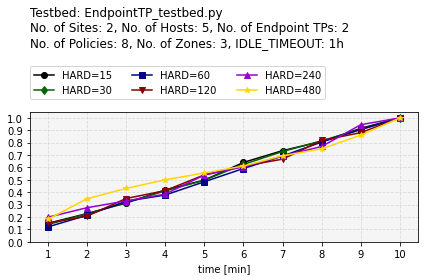

In [9]:
plt.title('Testbed: EndpointTP_testbed.py\nNo. of Sites: 2, No. of Hosts: 5, No. of Endpoint TPs: 2\nNo. of Policies: 8, No. of Zones: 3, IDLE_TIMEOUT: 1h\n\n\n\n', loc='left')


plt.xlabel('time [min]')

timeouts = [15, 30, 60, 120, 240, 480]
colors = ['black', 'darkgreen', 'darkblue', 'darkred', 'darkviolet', 'gold']
shapes = ['-o', '-d', '-s', '-v', '-^', '-*']
hard_dic = {'time':hard['time']}
for t in timeouts:
  hard_dic['HARD_TIMEOUT='+str(t)]= hard['HARD_TIMEOUT='+str(t)]
hard_df = pd.DataFrame(hard_dic)
hard_df
for t in timeouts:
  # PDF
  hard_df['pdf_'+str(t)] = hard_df['HARD_TIMEOUT='+str(t)] / sum(hard_df['HARD_TIMEOUT='+str(t)])
  # CDF
  hard_df['cdf_'+str(t)] = hard_df['pdf_'+str(t)].cumsum()
hard_df = hard_df.reset_index()
hard_df
for i in range(len(timeouts)):
  plt.plot(hard_df['time'], hard_df['cdf_'+str(timeouts[i])],shapes[i], label='HARD='+str(timeouts[i]), color=colors[i])

ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)
plt.tight_layout()
plt.savefig(base_dir+'packet-in_hard_cdf.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

# Plot
#test.plot(x = 'time', y = ['cdf_15', 'cdf_480'], grid = True)

In [10]:
hard_new = pd.read_csv(base_dir+'/packet_in_hard_new/res_HARD.csv')
hard_new

,second,HARD_TIMEOUT=10,HARD_TIMEOUT=20,HARD_TIMEOUT=30,HARD_TIMEOUT=60,HARD_TIMEOUT=120,HARD_TIMEOUT=240
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...
596,596,4,0,0,0,0,0
597,597,0,0,0,0,0,0
598,598,0,0,0,0,0,0
599,599,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


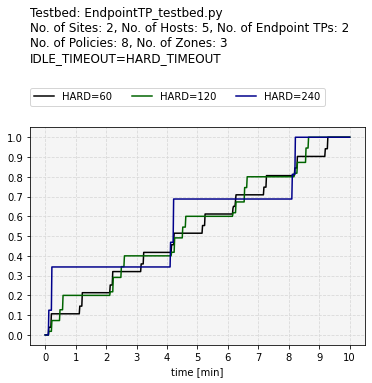

In [11]:
plt.title('Testbed: EndpointTP_testbed.py\nNo. of Sites: 2, No. of Hosts: 5, No. of Endpoint TPs: 2\nNo. of Policies: 8, No. of Zones: 3 \nIDLE_TIMEOUT=HARD_TIMEOUT\n\n\n\n', loc='left')
#plt.ylabel('flops/cycle')

plt.xlabel('time [min]')

timeouts = [60, 120, 240]
colors = ['black', 'darkgreen', 'darkblue', 'darkred', 'darkviolet', 'gold']
shapes = ['-o', '-d', '-s', '-v', '-^', '-*']
idle_dic = {'time':hard_new['second']}
for t in timeouts:
  idle_dic['HARD_TIMEOUT='+str(t)]= hard_new['HARD_TIMEOUT='+str(t)]
idle_df = pd.DataFrame(idle_dic)
idle_df
for t in timeouts:
  # PDF
  idle_df['pdf_'+str(t)] = idle_df['HARD_TIMEOUT='+str(t)] / sum(idle_df['HARD_TIMEOUT='+str(t)])
  # CDF
  idle_df['cdf_'+str(t)] = idle_df['pdf_'+str(t)].cumsum()
idle_df = idle_df.reset_index()
idle_df
for i in range(len(timeouts)):
  plt.plot(idle_df['time'], idle_df['cdf_'+str(timeouts[i])], label='HARD='+str(timeouts[i]), color=colors[i])

ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)

plt.savefig(base_dir+'packet-in_hard_new_cdf.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

# Plot
#test.plot(x = 'time', y = ['cdf_15', 'cdf_480'], grid = True)

In [12]:
find_zone = pd.read_csv(base_dir+'find_zone.csv')
find_zone

,scale_factor,time
0,1,18.379
1,2,34.570
2,4,65.707
3,8,129.102
4,16,253.738
5,32,503.696


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


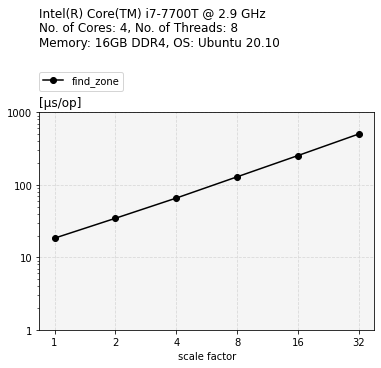

In [13]:
plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[\u03bcs/op]', loc='left')

plt.xlabel('scale factor')
plt.plot(find_zone['scale_factor'], find_zone['time'],'-o', label='find_zone', color='black')

ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yscale('log', basey=10)
plt.yticks([10**0, 10**1, 10**2, 10**3],['1','10','100','1000'])

plt.xscale('log', basex=2)
plt.xticks([1,2,4,8,16,32], ['1', '2', '4', '8', '16', '32'])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)
#plt.tight_layout()
plt.savefig(base_dir+'find_zone.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

In [14]:
check_packet = pd.read_csv(base_dir+'check_packet.csv')
check_packet

,scale_factor,time
0,1,41.987
1,2,73.658
2,4,136.878
3,8,261.328
4,16,508.224
5,32,907.949


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


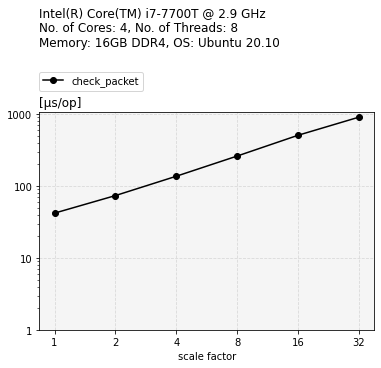

In [15]:
plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[\u03bcs/op]', loc='left')

plt.xlabel('scale factor')
plt.plot(check_packet['scale_factor'], check_packet['time'],'-o', label='check_packet', color='black')

ax = plt.axes()
ax.set_facecolor('whitesmoke')
ax.grid(True,color='#d9d9d9',linestyle='--')


plt.yscale('log', basey=10)
plt.yticks([10**0, 10**1, 10**2, 10**3], ['1', '10', '100', '1000'])

plt.xscale('log', basex=2)
plt.xticks([1,2,4,8,16,32], ['1', '2', '4', '8', '16', '32'])

plt.legend()
plt.legend(loc=(0,1.10), ncol=3)
#plt.tight_layout()
plt.savefig(base_dir+'check_packet.png', format='png', dpi=400,  bbox_inches='tight')
plt.show()

In [16]:
gateway_tp = pd.read_csv(base_dir+'gateway_tp.csv')
gateway_tp['Mbps']=gateway_tp['throughput'].multiply(8)
gateway_tp

,function,time,throughput,Mbps
0,ToMondrian,4976.500000,13.886667,111.093333
1,FromMondrian,3984.500000,35.038333,280.306667
2,Encryption,739.000000,92.943333,743.546667
3,Decryption,1681.000000,82.571667,660.573333
4,SendPacket,1293.666667,107.436667,859.493334
5,FromMondrianAndSend,7153.000000,19.426667,155.413333
6,FromMondrianAndSendNaive,13233.166670,10.500000,84.000000
7,ToMondrianAndSend,8708.166667,7.926667,63.413333
8,ToMondrianAndSendNaive,14981.833330,4.605000,36.840000


In [34]:
FromMondrianAndSend_time = 13233.166670/7153.000000
FromMondrianAndSend_mbps = 155.413333/84.000000
ToMondrianAndSend_time = 14981.833330/8708.166667
ToMondrianAndSend_mbps = 63.413333/36.840000
to_vs_from_time = 4976.500000/3984.500000
to_vs_from_mbps = 280.306667/111.093333

print('FromMondrianAndSend time improvement: '+str(FromMondrianAndSend_time))
print('FromMondrianAndSend throughput improvement: '+str(FromMondrianAndSend_mbps))
print('ToMondrianAndSend time improvement: '+str(ToMondrianAndSend_time))
print('ToMondrianAndSend throughput improvement: '+str(ToMondrianAndSend_mbps))
print('FromMondrian is '+str(to_vs_from_time)+'x better time wise and '+str(to_vs_from_mbps)+'x throughput wise')

FromMondrianAndSend time improvement: 1.850016310638893
FromMondrianAndSend throughput improvement: 1.8501587261904762
ToMondrianAndSend time improvement: 1.7204348404095606
ToMondrianAndSend throughput improvement: 1.7213173995656894
FromMondrian is 1.2489647383611495x better time wise and 2.5231637167641736x throughput wise


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


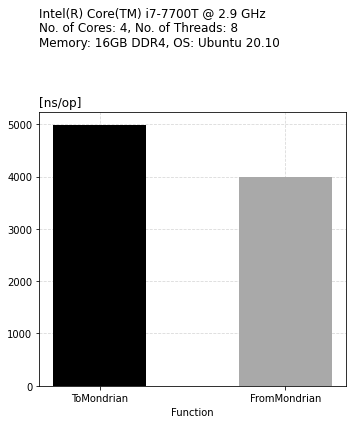

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']

plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[ns/op]', loc='left')


x = np.array([1])

width = 0.05
offset = 0.1



ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'ToMondrian']['time'], width, label='ToMondrian', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'FromMondrian']['time'], width, label='FromMondrian', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')



plt.xticks([x, x+1*offset], ('ToMondrian', 'FromMondrian'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'mondrian_transform_time.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


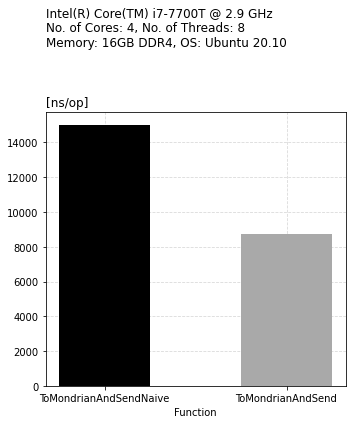

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']

plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[ns/op]', loc='left')


x = np.array([1])

width = 0.05
offset = 0.1



ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'ToMondrianAndSendNaive']['time'], width, label='ToMondrianAndSendNaive', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'ToMondrianAndSend']['time'], width, label='ToMondrianAndSend', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')



plt.xticks([x, x+1*offset], ('ToMondrianAndSendNaive', 'ToMondrianAndSend'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'to_mondrian_and_send_opt_time.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


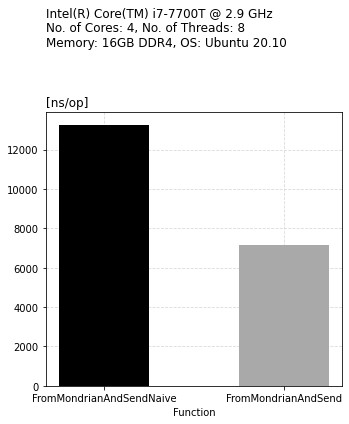

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']

plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[ns/op]', loc='left')


x = np.array([1])

width = 0.05
offset = 0.1



ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'FromMondrianAndSendNaive']['time'], width, label='FromMondrianAndSendNaive', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'FromMondrianAndSend']['time'], width, label='FromMondrianAndSend', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')



plt.xticks([x, x+1*offset], ('FromMondrianAndSendNaive', 'FromMondrianAndSend'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'from_mondrian_and_send_opt_time.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

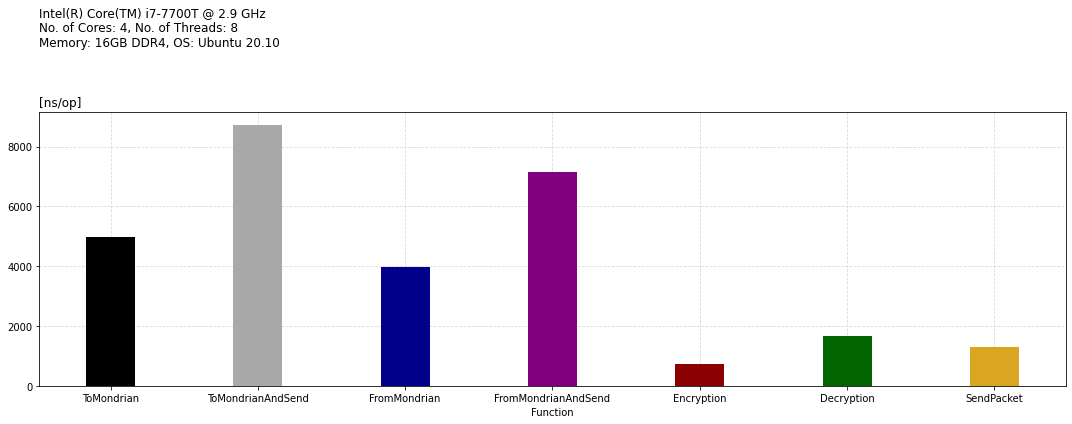

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']

plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[ns/op]', loc='left')


x = np.array([1])

width = 0.1
offset = 0.3



ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'ToMondrian']['time'], width, label='ToMondrian', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'ToMondrianAndSend']['time'], width, label='ToMondrianAndSend', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')

ax3 = plt.subplot(111)
ax3.bar(x + 2*offset ,gateway_tp.loc[gateway_tp['function'] == 'FromMondrian']['time'] , width, label='FromMondrian', align='center', color=colors[2])
ax3.set_xticks(x)
ax3.grid(True,color='#d9d9d9',linestyle='--')

ax4 = plt.subplot(111)
ax4.bar(x + 3*offset, gateway_tp.loc[gateway_tp['function'] == 'FromMondrianAndSend']['time'], width, label='FromMondrianAndSend', align='center', color=colors[3])
ax4.set_xticks(x)
ax4.grid(True,color='#d9d9d9',linestyle='--')

ax5 = plt.subplot(111)
ax5.bar(x + 4*offset, gateway_tp.loc[gateway_tp['function'] == 'Encryption']['time'], width, label='Encryption', align='center', color=colors[4])
ax5.set_xticks(x)
ax5.grid(True,color='#d9d9d9',linestyle='--')

ax6 = plt.subplot(111)
ax6.bar(x + 5*offset, gateway_tp.loc[gateway_tp['function'] == 'Decryption']['time'], width, label='Decryption', align='center', color=colors[5])
ax6.set_xticks(x)
ax6.grid(True,color='#d9d9d9',linestyle='--')

ax7 = plt.subplot(111)
ax7.bar(x+6*offset, gateway_tp.loc[gateway_tp['function'] == 'SendPacket']['time'], width, label='SendPacket', align='center', color=colors[6])
ax7.set_xticks(x)
ax7.grid(True,color='#d9d9d9',linestyle='--')


plt.xticks([x, x+1*offset, x+2*offset, x+3*offset, x+4*offset, x+5*offset, x+6*offset], ('ToMondrian', 'ToMondrianAndSend', 'FromMondrian',  'FromMondrianAndSend', 'Encryption', 'Decryption', 'SendPacket'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'gateway_tp_time.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

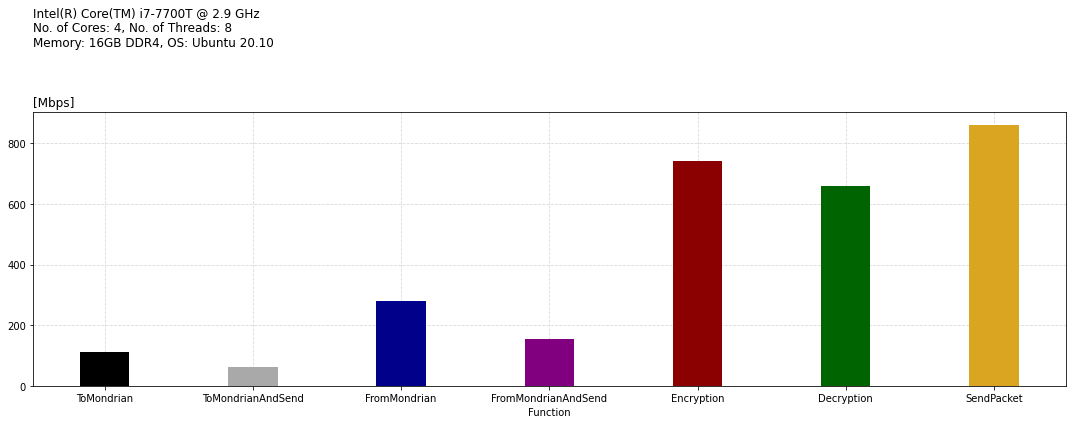

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']
plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[Mbps]', loc='left')


x = np.array([1])

width = 0.1
offset = 0.3

ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'ToMondrian']['Mbps'], width, label='ToMondrian', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'ToMondrianAndSend']['Mbps'], width, label='ToMondrianAndSend', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')

ax3 = plt.subplot(111)
ax3.bar(x + 2*offset ,gateway_tp.loc[gateway_tp['function'] == 'FromMondrian']['Mbps'] , width, label='FromMondrian', align='center', color=colors[2])
ax3.set_xticks(x)
ax3.grid(True,color='#d9d9d9',linestyle='--')

ax4 = plt.subplot(111)
ax4.bar(x + 3*offset, gateway_tp.loc[gateway_tp['function'] == 'FromMondrianAndSend']['Mbps'], width, label='FromMondrianAndSend', align='center', color=colors[3])
ax4.set_xticks(x)
ax4.grid(True,color='#d9d9d9',linestyle='--')

ax5 = plt.subplot(111)
ax5.bar(x + 4*offset, gateway_tp.loc[gateway_tp['function'] == 'Encryption']['Mbps'], width, label='Encryption', align='center', color=colors[4])
ax5.set_xticks(x)
ax5.grid(True,color='#d9d9d9',linestyle='--')

ax6 = plt.subplot(111)
ax6.bar(x + 5*offset, gateway_tp.loc[gateway_tp['function'] == 'Decryption']['Mbps'], width, label='Decryption', align='center', color=colors[5])
ax6.set_xticks(x)
ax6.grid(True,color='#d9d9d9',linestyle='--')

ax7 = plt.subplot(111)
ax7.bar(x+6*offset, gateway_tp.loc[gateway_tp['function'] == 'SendPacket']['Mbps'], width, label='SendPacket', align='center', color=colors[6])
ax7.set_xticks(x)
ax7.grid(True,color='#d9d9d9',linestyle='--')


plt.xticks([x, x+1*offset, x+2*offset, x+3*offset, x+4*offset, x+5*offset, x+6*offset], ('ToMondrian', 'ToMondrianAndSend', 'FromMondrian',  'FromMondrianAndSend', 'Encryption', 'Decryption', 'SendPacket'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'gateway_tp_throughput.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


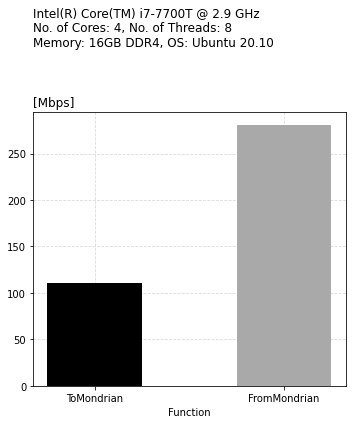

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']
plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[Mbps]', loc='left')


x = np.array([1])

width = 0.05
offset = 0.1

ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'ToMondrian']['Mbps'], width, label='ToMondrian', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'FromMondrian']['Mbps'], width, label='FromMondrian', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')


plt.xticks([x, x+1*offset], ('ToMondrian', 'FromMondrian'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'mondrian_transform_throughput.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


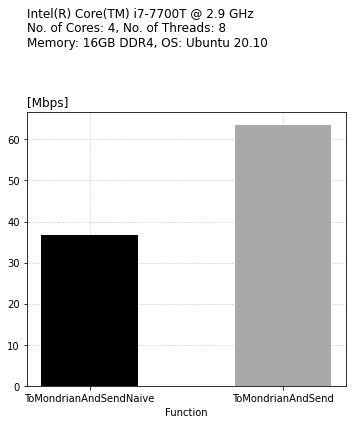

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']
plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[Mbps]', loc='left')


x = np.array([1])

width = 0.05
offset = 0.1

ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'ToMondrianAndSendNaive']['Mbps'], width, label='ToMondrianAndSendNaive', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'ToMondrianAndSend']['Mbps'], width, label='ToMondrianAndSend', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')


plt.xticks([x, x+1*offset], ('ToMondrianAndSendNaive', 'ToMondrianAndSend'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'to_mondrian_and_send_opt_throughput.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


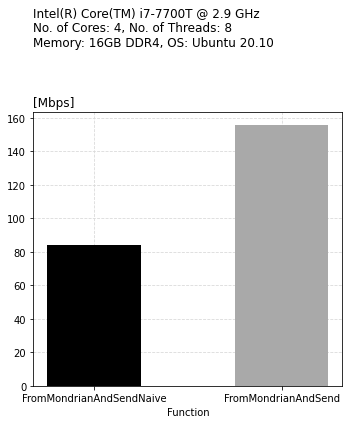

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,6)
colors = ['black', 'darkgrey', 'darkblue', 'purple', 'darkred', 'darkgreen', 'goldenrod']
plt.title('Intel(R) Core(TM) i7-7700T @ 2.9 GHz\nNo. of Cores: 4, No. of Threads: 8\nMemory: 16GB DDR4, OS: Ubuntu 20.10\n\n\n\n[Mbps]', loc='left')


x = np.array([1])

width = 0.05
offset = 0.1

ax1 = plt.subplot(111)
ax1.bar(x,  gateway_tp.loc[gateway_tp['function'] == 'FromMondrianAndSendNaive']['Mbps'], width, label='FromMondrianAndSendNaive', align='center', color=colors[0])
ax1.set_xticks(x)
ax1.grid(True,color='#d9d9d9',linestyle='--')
ax1.set_axisbelow(True)

ax2 = plt.subplot(111)
ax2.bar(x+1*offset, gateway_tp.loc[gateway_tp['function'] == 'FromMondrianAndSend']['Mbps'], width, label='FromMondrianAndSend', align='center', color=colors[1])
ax2.set_xticks(x)
ax2.grid(True,color='#d9d9d9',linestyle='--')


plt.xticks([x, x+1*offset], ('FromMondrianAndSendNaive', 'FromMondrianAndSend'))

plt.xlabel('Function')
plt.tight_layout()
plt.savefig(base_dir+'from_mondrian_and_send_opt_throughput.png', format='png', dpi=400,  bbox_inches='tight')


plt.show()